<a href="https://colab.research.google.com/github/manalibhoir22/manali/blob/master/COUNT_VECTORIZER_AND_CLASSIFIERSfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

In [1]:
import string
import nltk 
from nltk.corpus import stopwords
from nltk import PorterStemmer
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer



## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
#XGB and TFIDF VECTORIZER:

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from sklearn.dummy import DummyClassifier
import numpy as np
import pandas as pd

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
import numpy as np
import pandas as pd
df = pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,1,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,2,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,3,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,4,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,5,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


# Dropping unnecessary columns

In [3]:
df.drop(df.columns[[0,1,3,4,8,9]],axis=1,inplace=True)
df.head()

,asin,reviewText,overall,summary
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good
1,120401325X,These stickers work like the review says they ...,5,Really great product.
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s


# Remove Blank Records and null values

In [4]:
df.isnull().sum()

asin           0
reviewText    99
overall        0
summary        1
dtype: int64

In [5]:
# Check for whitespace strings (it's OK if there aren't any!):
blanks = []  # start with an empty list

for i,asin,rv,ov,summ in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

    if type(summ)==str:            # avoid NaN values
        if summ.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list   
    
  
len(blanks)

0

In [6]:
df.dropna(inplace=True)

#### Convert reviewText to the string 

In [7]:
df['reviewText']=df['reviewText'].apply(str)
df.head()

,asin,reviewText,overall,summary
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good
1,120401325X,These stickers work like the review says they ...,5,Really great product.
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s


In [8]:
len(df['reviewText'])

194339

### Cleaning the data 
Remove ‘\n’

Remove emojis if any

Remove punctuation marks

Remove extra spaces

Remove stopwords — Stopwords are those words which occur very frequently but are not required for analysis as they provide no insights. Removing them will reduce computational load. They include words like I, me, myself, that, him, etc.

In [9]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

stop_words = ['in','of','at','a','the','and','is','on','an','they','was','it','i','them','to','these','this']

def decontracted(phrase):
    phrase=re.sub(r"won't","will not",phrase)
    phrase=re.sub(r"can't","can not",phrase)
    phrase=re.sub(r"n\'t"," not",phrase)
    phrase=re.sub(r"\'re"," are",phrase)
    phrase=re.sub(r"\'s"," is",phrase)
    phrase=re.sub(r"\'d"," would",phrase)
    phrase=re.sub(r"\'ll"," will",phrase)    
    phrase=re.sub(r"\'t"," not",phrase)
    phrase=re.sub(r"\'ve"," have",phrase)
    phrase=re.sub(r"\'m"," am",phrase)
    return phrase


##STEMMING USING SNOWBALL
snow_stemmer = SnowballStemmer(language='english')

#LEMMATIZATION
lemmatizer = WordNetLemmatizer()

In [10]:
def clean_text(text):
    
    snow_stemmer = SnowballStemmer(language='english')
    
    lemmatizer = WordNetLemmatizer()
    
    text = decontracted(text)
    
    text = deEmojify(text) #remove Emojis
    
    text_cleaned = "".join([x for x in text if x not in string.punctuation]) #remove punctuation
    
    text_cleaned = re.sub(' +', ' ',text_cleaned) #remove extra spaces
    
    text_cleaned = text_cleaned.lower() #converting into lower case
    
    tokens = text_cleaned.split(" ")
    
    tokens = [token for token in tokens if token not in stop_words] #taking only those words which are not stop words 
    
    text_cleaned = " ".join([snow_stemmer.stem(token) for token in tokens])
    
    text_cleaned = " ".join([lemmatizer.lemmatize(token) for token in tokens])
    
    return text_cleaned

Apply this on reviews column

In [11]:
df['cleaned_reviews']=df['reviewText'].apply(lambda x:clean_text(x))
df.head()

,asin,reviewText,overall,summary,cleaned_reviews
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,look good stick good just do not like rounded ...
1,120401325X,These stickers work like the review says they ...,5,Really great product.,sticker work like review say do stick great st...
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,are awesome make my phone look so stylish have...
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,item arrived great time perfect condition howe...
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,awesome stay look great can be used multiple a...


In [12]:
def sentiment(n):
    return 1 if n >= 4 else 0
df['sentiment'] = df['overall'].apply(sentiment)
df.head()

,asin,reviewText,overall,summary,cleaned_reviews,sentiment
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,look good stick good just do not like rounded ...,1
1,120401325X,These stickers work like the review says they ...,5,Really great product.,sticker work like review say do stick great st...,1
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,are awesome make my phone look so stylish have...,1
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,item arrived great time perfect condition howe...,1
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,awesome stay look great can be used multiple a...,1


In [13]:
df['sentiment'].value_counts()

1    148575
0     45764
Name: sentiment, dtype: int64

<font color=green>148575 out of 194339 messages, or 76.45%, are positive reviews. This means that any text classification model we create has to perform **better than 76.45%** to beat random chance.</font>

# Splitting into train and test

In [14]:
from sklearn.model_selection import train_test_split

X = df['cleaned_reviews']  # this time we want to look at the text
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (130207,)
Testing Data Shape:  (64132,)


# TRAIN DIFFERENT CLASSIFIERS

# Build pipelines to vectorize the data, then train and fit a model
Now that we have sets to train and test, we'll develop a selection of pipelines, each with a different model.

# USING COUNTVECTORIZER 

In [ ]:
# Naïve Bayes:
text_clf_nb_cv = Pipeline([('cv', CountVectorizer(binary = True,ngram_range=(1,2))),
                     ('clf', MultinomialNB(alpha = 0.25)),
])

# Linear SVC:
text_clf_lsvc_cv = Pipeline([('cv', CountVectorizer(binary = True,ngram_range=(1,2))),
                     ('clf', LinearSVC(C = 0.01,max_iter = 1000)),
])

# Logistic Regression:
text_clf_lr_cv = Pipeline([('cv',CountVectorizer(binary = True,ngram_range=(1,2))),
                     ('clf', LogisticRegression(C=0.25,max_iter = 1000)),
])


In [ ]:
#Random Forest:
text_clf_rf_cv = Pipeline([('cv',CountVectorizer(binary = True, ngram_range=(1,2))),
                              ('clf',RandomForestClassifier()),
])

In [15]:
#XGB
text_clf_xgb_cv = Pipeline([('cv',CountVectorizer(binary=True,ngram_range=(1,2))),
                    ('clf',XGBClassifier(learning_rate=0.3,n_estimators=2000)),
])

## Feed the training data through this pipeline

In [ ]:
##FEEDING training Data Through Pipeline
## Naïve Bayes:
text_clf_nb_cv.fit(X_train, y_train) 

# Linear SVC:
text_clf_lsvc_cv.fit(X_train, y_train) 

#Logistic Regression
text_clf_lr_cv.fit(X_train, y_train) 


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=0.25, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                           

In [ ]:
#Random Forest
text_clf_rf_cv.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None))...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

In [16]:
#XGB
text_clf_xgb_cv.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None))...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.3,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing

# Form Prediction set

In [ ]:
# Form a prediction set

# Naïve Bayes:
predictions_nb_cv = text_clf_nb_cv.predict(X_test)

#Linear SVC
predictions_lsvc_cv = text_clf_lsvc_cv.predict(X_test)

#logistics Regression
predictions_lr_cv = text_clf_lr_cv.predict(X_test)

##RANDOM FOREST
predictions_rf_cv = text_clf_rf_cv.predict(X_test)



In [17]:
#XGB
predictions_xgb_cv = text_clf_xgb_cv.predict(X_test)

# Confusion Matrix

In [ ]:
# Report the confusion matrix

# Naïve Bayes:
pd.DataFrame(metrics.confusion_matrix(y_test,predictions_nb_cv),index=['neg','pos'], columns=['neg','pos'])

,neg,pos
neg,9035,5969
pos,2424,46704


In [ ]:


#Linear SVC
pd.DataFrame(metrics.confusion_matrix(y_test,predictions_lsvc_cv),index=['neg','pos'], columns=['neg','pos'])

,neg,pos
neg,10090,4914
pos,2555,46573


In [ ]:
#logistic Regression 
pd.DataFrame(metrics.confusion_matrix(y_test,predictions_lr_cv),index=['neg','pos'], columns=['neg','pos'])

,neg,pos
neg,10259,4745
pos,2699,46429


In [ ]:
#Random Forest
pd.DataFrame(metrics.confusion_matrix(y_test,predictions_rf_cv),index=['neg','pos'], columns=['neg','pos'])

,neg,pos
neg,2699,12305
pos,176,48952


In [ ]:
#XGB
pd.DataFrame(metrics.confusion_matrix(y_test,predictions_xgb_cv),index=['neg','pos'], columns=['neg','pos'])

,neg,pos
neg,9654,5350
pos,2318,46810


# CLASSIFICATION REPORT

In [ ]:
print('===================a classification report with Count Vectorizer======================') #a classification report
#NAIVE BAYES
print('========================NAIVE BAYES====================')

print(metrics.classification_report(y_test,predictions_nb_cv))

#Linear SVC
print('=====================LINEAR SVC=========================')

print(metrics.classification_report(y_test,predictions_lsvc_cv))

#logiatic Regression 
print('===================LOGISTIC REGRESSION=====================')
print(metrics.classification_report(y_test,predictions_lr_cv))

##Random FOrest
print('======================RANDOM FOREST WITH TFIDF====================')

print(metrics.classification_report(y_test,predictions_rf_cv))

##XGB
print('=======================XGB WITH TFIDF==============================')

print(metrics.classification_report(y_test,predictions_xgb_cv))

===================a classification report with Count Vectorizer======================
========================NAIVE BAYES====================
              precision    recall  f1-score   support

           0       0.79      0.60      0.68     15004
           1       0.89      0.95      0.92     49128

    accuracy                           0.87     64132
   macro avg       0.84      0.78      0.80     64132
weighted avg       0.86      0.87      0.86     64132

=====================LINEAR SVC=========================
              precision    recall  f1-score   support

           0       0.80      0.67      0.73     15004
           1       0.90      0.95      0.93     49128

    accuracy                           0.88     64132
   macro avg       0.85      0.81      0.83     64132
weighted avg       0.88      0.88      0.88     64132

===================LOGISTIC REGRESSION=====================
              precision    recall  f1-score   support

           0       0.79      0.

In [ ]:
# Print the overall accuracy (Binary = True)
print(f"The overall accuracy using naive bayes is : {metrics.accuracy_score(y_test,predictions_nb_cv)}")

print('--------------------------------------------------------------------------')

print(f"The overall accuracy using linear SVC is : {metrics.accuracy_score(y_test,predictions_lsvc_cv)}")

print('--------------------------------------------------------------------------')

print(f"The Final accuracy using Logistic Regression is : {metrics.accuracy_score(y_test,predictions_lr_cv)}")

print('--------------------------------------------------------------------------')

print(f"The Final accuracy using Random Forest is : {metrics.accuracy_score(y_test,predictions_rf_cv)}")

print('--------------------------------------------------------------------------')

print(f"The Final accuracy using XGB is : {metrics.accuracy_score(y_test,predictions_xgb_cv)}")

The overall accuracy using naive bayes is : 0.8691292958273561
--------------------------------------------------------------------------
The overall accuracy using linear SVC is : 0.8835370797729682
--------------------------------------------------------------------------
The Final accuracy using Logistic Regression is : 0.8839269007671677
--------------------------------------------------------------------------
The Final accuracy using Random Forest is : 0.8053857668558598
--------------------------------------------------------------------------
The Final accuracy using XGB is : 0.8804341046591405


# Confusion Matrix Plot Function

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.tab20b):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [19]:

def disp_confusion_matrix(y_pred, model_name, vector = 'Count Vectorizer'):
    """
    Display confusion matrix for selected model with Count Vectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

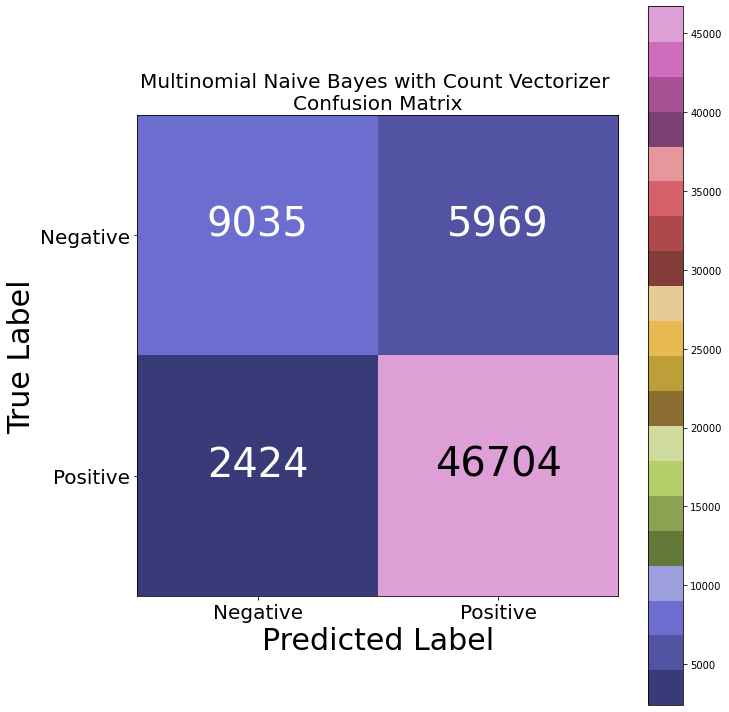

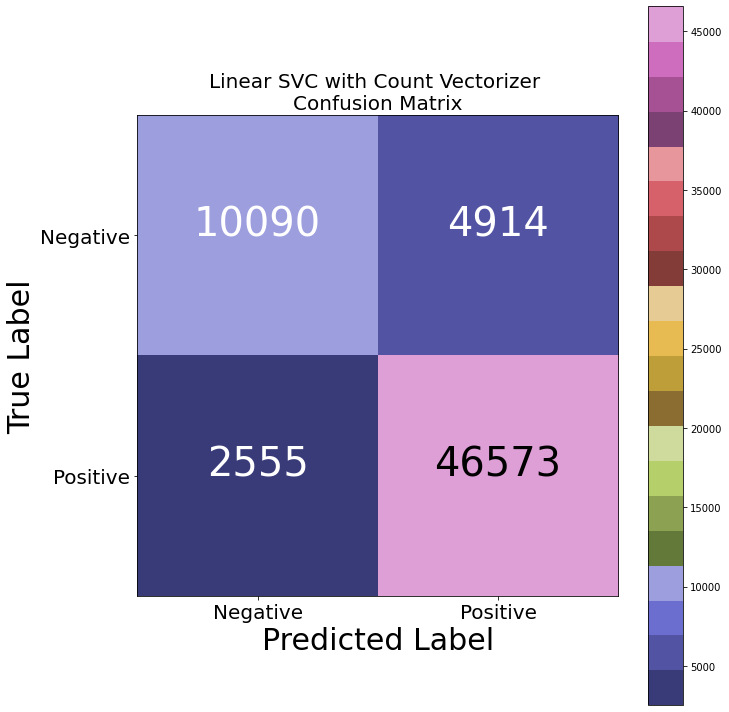

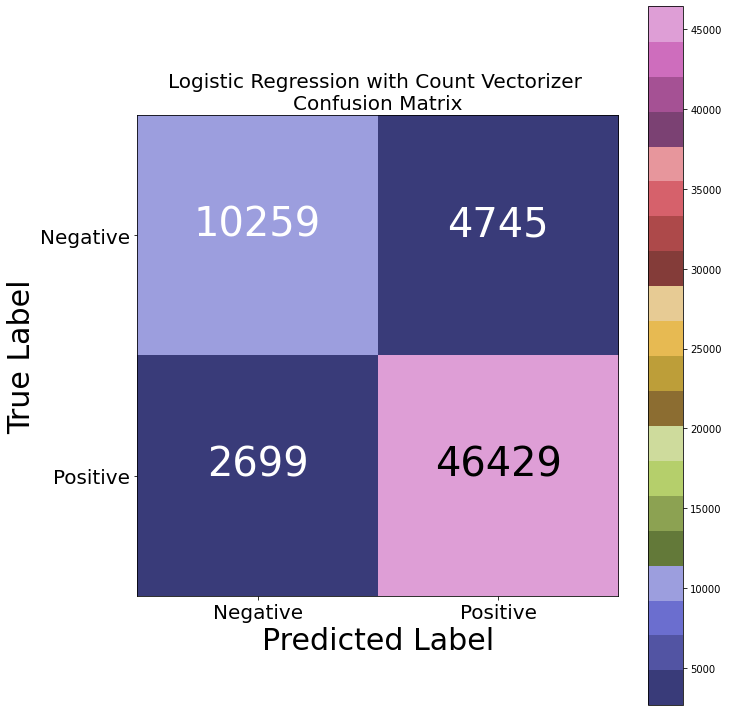

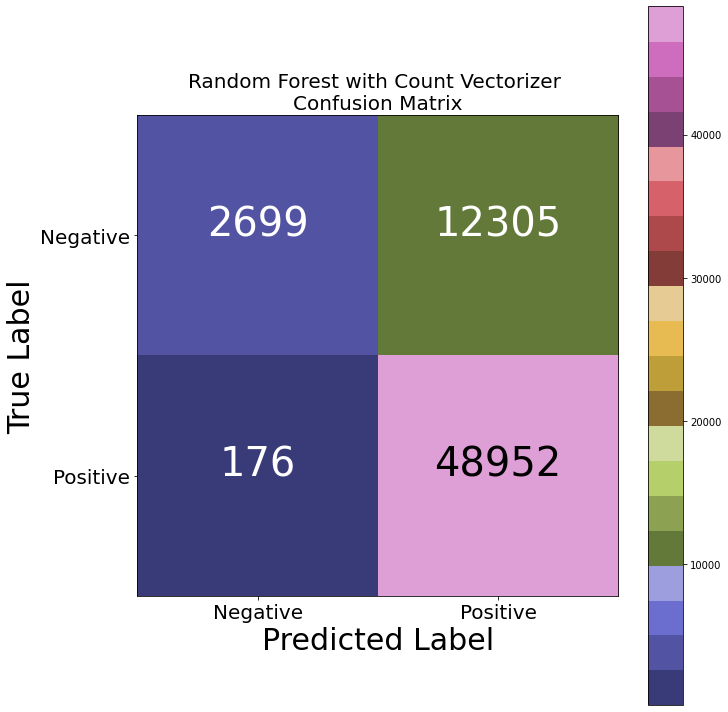

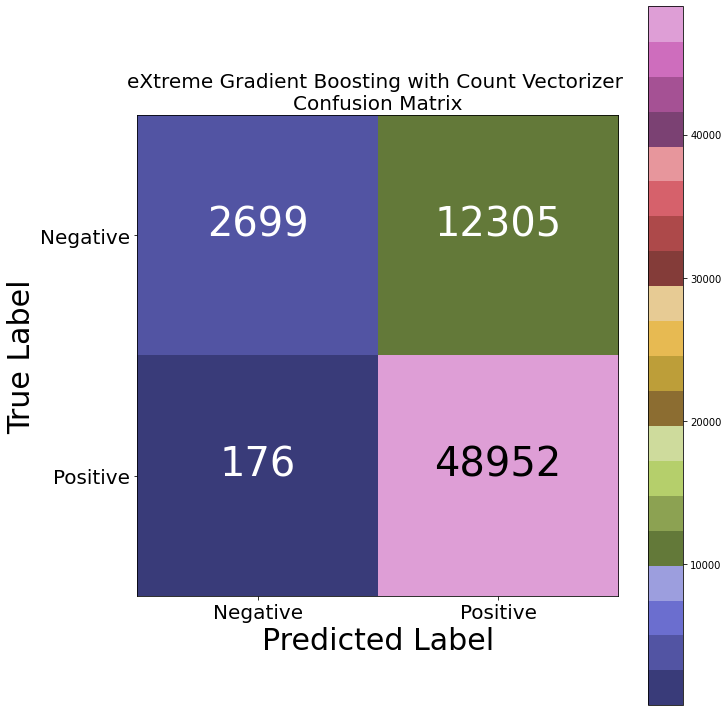

In [ ]:
disp_confusion_matrix(predictions_nb_cv, "Multinomial Naive Bayes")
disp_confusion_matrix(predictions_lsvc_cv, "Linear SVC")
disp_confusion_matrix(predictions_lr_cv, "Logistic Regression")
disp_confusion_matrix(predictions_rf_cv, "Random Forest")
disp_confusion_matrix(predictions_rf_cv, "eXtreme Gradient Boosting")

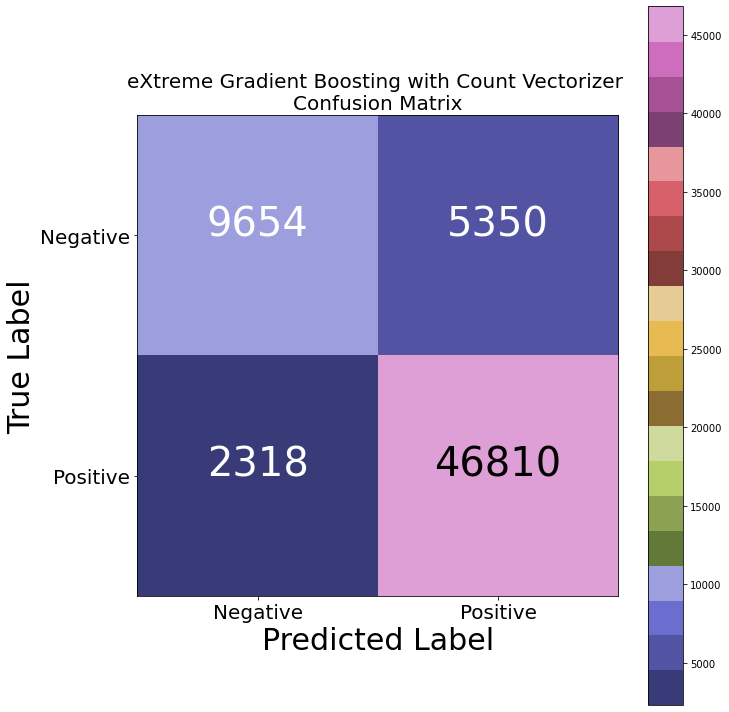

In [20]:
disp_confusion_matrix(predictions_xgb_cv, "eXtreme Gradient Boosting")

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.viridis_r):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

def disp_confusion_matrix(y_pred, model_name, vector = 'Count Vectorizer'):
    """
    Display confusion matrix for selected model with Count Vectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()


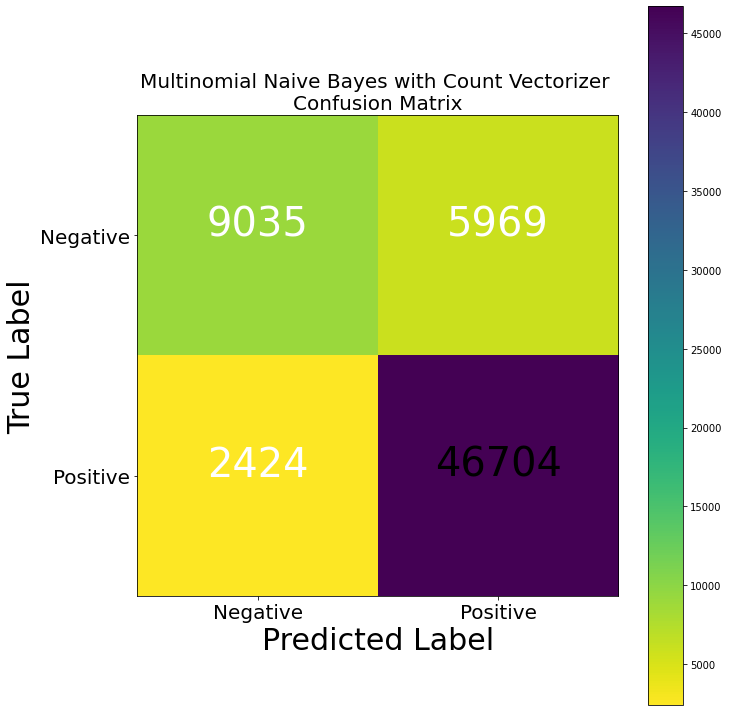

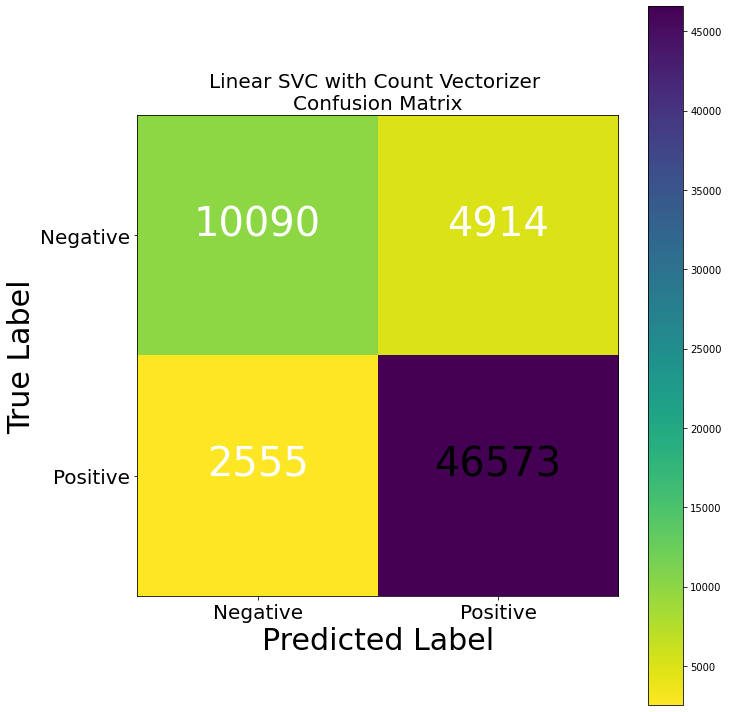

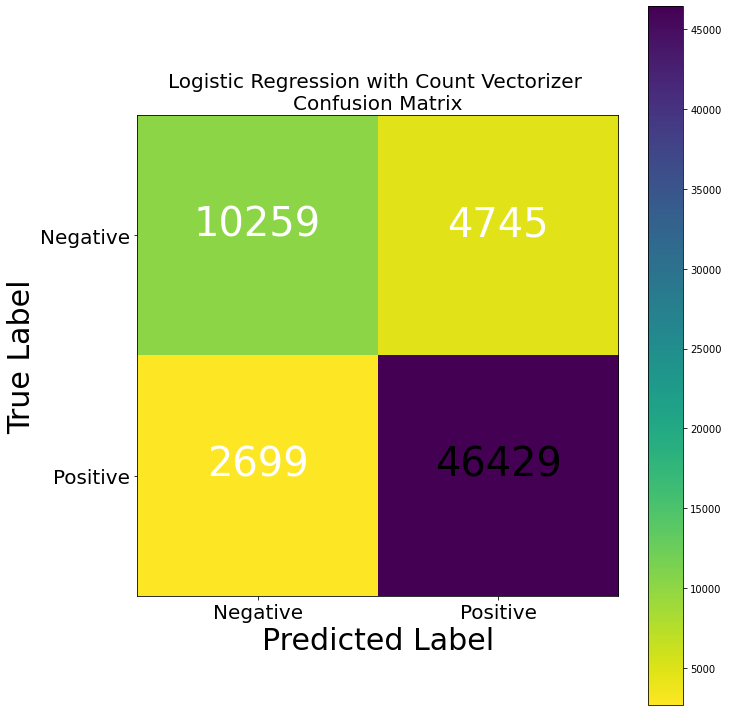

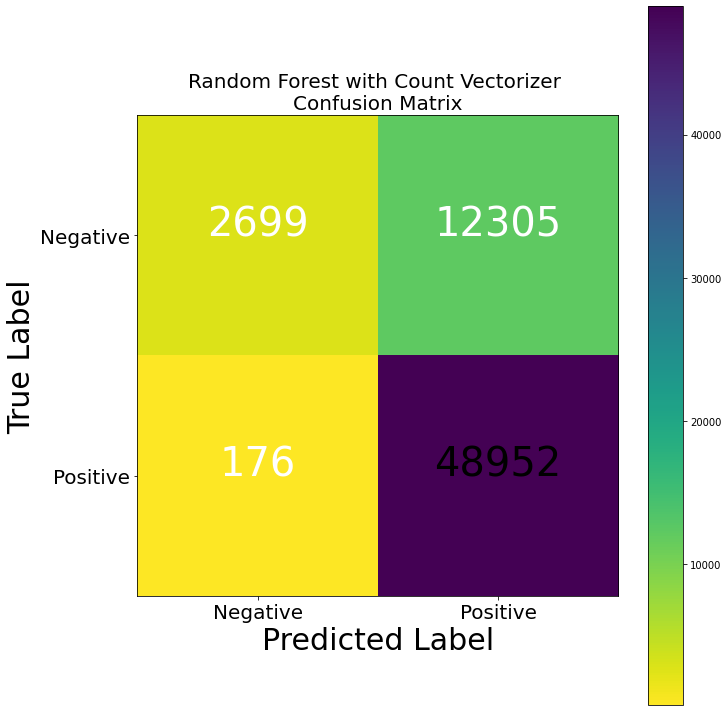

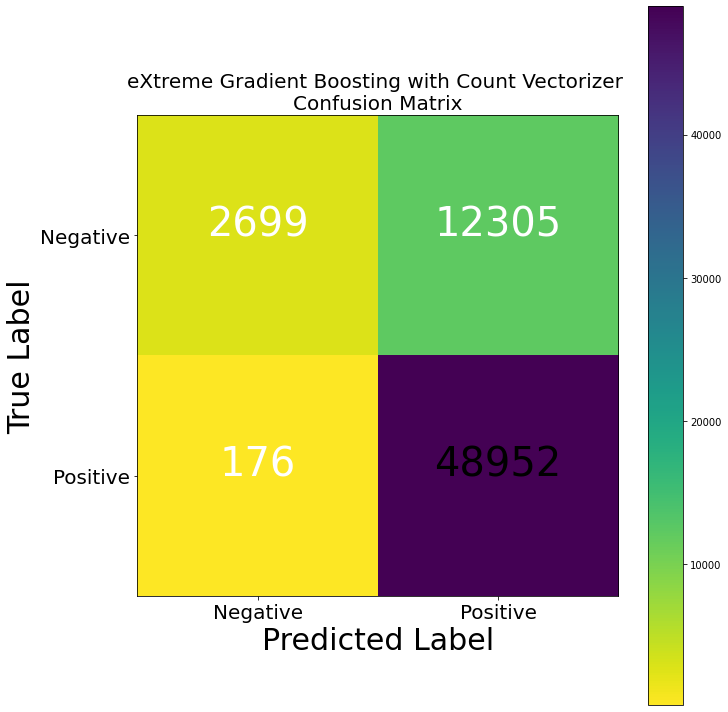

In [ ]:
disp_confusion_matrix(predictions_nb_cv, "Multinomial Naive Bayes")
disp_confusion_matrix(predictions_lsvc_cv, "Linear SVC")
disp_confusion_matrix(predictions_lr_cv, "Logistic Regression")
disp_confusion_matrix(predictions_rf_cv, "Random Forest")
disp_confusion_matrix(predictions_rf_cv, "eXtreme Gradient Boosting")

# CLASSIFICATION REPORT IN DATAFRAME

In [ ]:

# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['Negative or "0"', 'Positive or "1"', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [ ]:

#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

In [ ]:
comparison_table(y_preds = [predictions_nb_cv,predictions_lsvc_cv,predictions_lr_cv,predictions_rf_cv,predictions_xgb_cv], 
                labels = ['Multinomial NB', 'LinearSVC','LogReg','RandomForest','XGB'])

In [ ]:
df_tv2

precision  ...  support
vectorizer model          accuracy class                       ...         
CountVect  Multinomial NB 0.869129 Negative or "0"   0.788463  ...  15004.0
                                   Positive or "1"   0.886678  ...  49128.0
                                   average           0.863700  ...  64132.0
           LinearSVC      0.883537 Negative or "0"   0.797944  ...  15004.0
                                   Positive or "1"   0.904558  ...  49128.0
                                   average           0.879615  ...  64132.0
           LogReg         0.883927 Negative or "0"   0.791712  ...  15004.0
                                   Positive or "1"   0.907277  ...  49128.0
                                   average           0.880240  ...  64132.0
           RandomForest   0.805386 Negative or "0"   0.938783  ...  15004.0
                                   Positive or "1"   0.799125  ...  49128.0
                                   average           0.831799  ...  64132.0
           XGB            0.880434 Negative or "0"   0.806382  ...  15004.0
                                   Positive or "1"   0.897431  ...  49128.0
                                   average           0.876130  ...  64132.0

[15 rows x 4 columns]

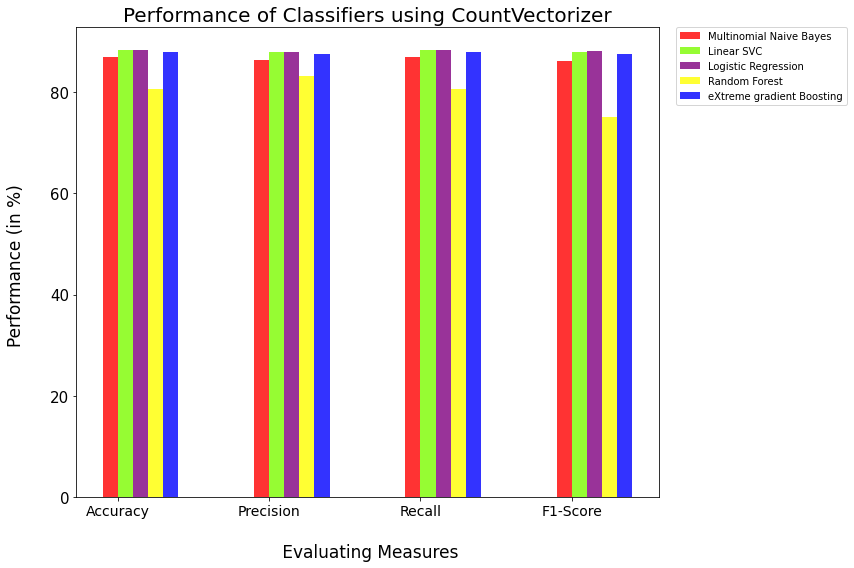

In [ ]:
#Graph Plotting Code:COuntvectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
n_groups = 4
score_MNB = (86.91,86.37,86.91,86.26)
score_LSVC = (88.35,87.96,88.35,87.99)
score_LR=(88.39,88.02,88.39,88.09)
score_RF=(80.54,83.18,80.54,75.01)
score_XGB=(88.04,87.61,88.04,87.55)

#n1=(score_MNB[0], score_LR[0], score_LSVC[0], score_RF[0],score_XGB[0])
#n2=(score_MNB[1], score_LR[1], score_LSVC[1], score_RF[1],score_XGB[1])
#n3=(score_MNB[2], score_LR[2], score_LSVC[2], score_RF[2],score_XGB[2])
#n4=(score_MNB[3], score_LR[3], score_LSVC[3], score_RF[3],score_XGB[3])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index,score_MNB, bar_width,
 alpha=opacity, color='red',
 error_kw=error_config,label='Multinomial Naive Bayes')

z=index + bar_width
rects2 = ax.bar(z, score_LSVC, bar_width,
 alpha=opacity, color='lawngreen',
 error_kw=error_config,
 label='Linear SVC')

z=z+ bar_width
rects3 = ax.bar(z, score_LR, bar_width,
 alpha=opacity, color='purple',
 error_kw=error_config,
 label='Logistic Regression')

z=z+ bar_width
rects4 = ax.bar(z, score_RF, bar_width,
 alpha=opacity, color='yellow',
 error_kw=error_config,label='Random Forest')

z=z+ bar_width
rects5 = ax.bar(z, score_XGB, bar_width,
 alpha=opacity, color='blue',
 error_kw=error_config,
 label='eXtreme gradient Boosting')

ax.set_xlabel('\n Evaluating Measures',fontsize = 17)
ax.set_ylabel('Performance (in %) \n',fontsize = 17)
ax.set_title('Performance of Classifiers using CountVectorizer',fontsize=20)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Accuracy', 'Precision', 'Recall','F1-Score'),fontsize = 14)
ax.set_yticklabels((0,20,40,60,80),fontsize = 15)
ax.legend(bbox_to_anchor=(1.03, 1.0), borderaxespad=0)
fig.set_size_inches(12,8)
fig.tight_layout()
plt.show()

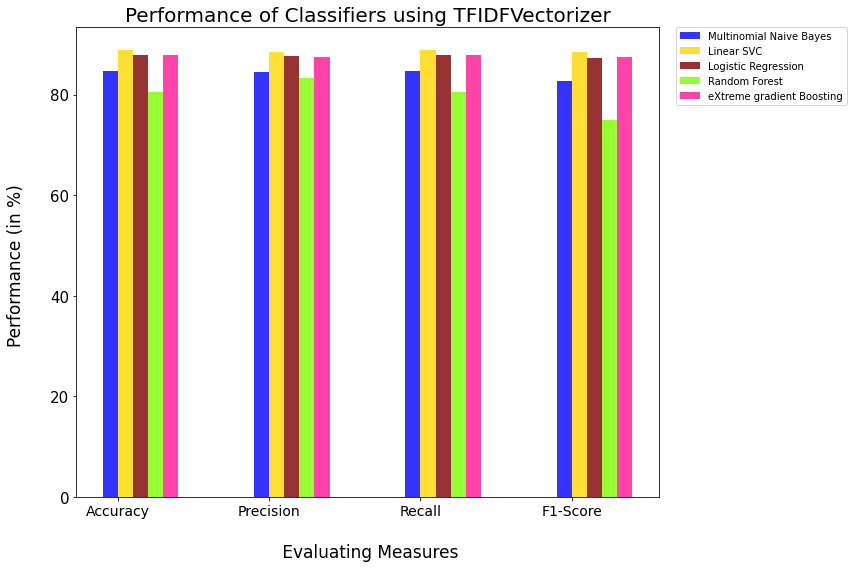

In [ ]:
#Graph Plotting Code:TFIDF
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
n_groups = 4
score_MNB = (84.62,84.43,84.62,82.72)
score_LSVC = (88.92,88.57,88.92,88.53)
score_LR=(87.93,87.59,87.93,87.21)
score_RF=(80.52,83.22,80.51,74.95)
score_XGB=(87.87,87.42,87.87,87.41)

#n1=(score_MNB[0], score_LR[0], score_LSVC[0], score_RF[0],score_XGB[0])
#n2=(score_MNB[1], score_LR[1], score_LSVC[1], score_RF[1],score_XGB[1])
#n3=(score_MNB[2], score_LR[2], score_LSVC[2], score_RF[2],score_XGB[2])
#n4=(score_MNB[3], score_LR[3], score_LSVC[3], score_RF[3],score_XGB[3])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index,score_MNB, bar_width,
 alpha=opacity, color='blue',
 error_kw=error_config,label='Multinomial Naive Bayes')

z=index + bar_width
rects2 = ax.bar(z, score_LSVC, bar_width,
 alpha=opacity, color='gold',
 error_kw=error_config,
 label='Linear SVC')

z=z+ bar_width
rects3 = ax.bar(z, score_LR, bar_width,
 alpha=opacity, color='maroon',
 error_kw=error_config,
 label='Logistic Regression')

z=z+ bar_width
rects4 = ax.bar(z, score_RF, bar_width,
 alpha=opacity, color='lawngreen',
 error_kw=error_config,label='Random Forest')

z=z+ bar_width
rects5 = ax.bar(z, score_XGB, bar_width,
 alpha=opacity, color='deeppink',
 error_kw=error_config,
 label='eXtreme gradient Boosting')

ax.set_xlabel('\n Evaluating Measures',fontsize = 17)
ax.set_ylabel('Performance (in %) \n',fontsize = 17)
ax.set_title('Performance of Classifiers using TFIDFVectorizer',fontsize=20)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Accuracy', 'Precision', 'Recall','F1-Score'),fontsize = 14)
ax.set_yticklabels((0,20,40,60,80),fontsize = 15)
ax.legend(bbox_to_anchor=(1.03, 1.0), borderaxespad=0)
fig.set_size_inches(12,8)
fig.tight_layout()
plt.show()